<a href="https://colab.research.google.com/github/laurenskie/Predictive_analytics_Sp24/blob/main/Rivera_MPG_Prediction_Project_Part_I_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

I wanted to look at the predicted salaries for data professionals in the US.

#Task 2a: Install the Needed Libraries

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Task 2b: Import the Needed Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 3: Load the Data

Here is a copy of the file: https://drive.google.com/file/d/1FzRXr8ksaa24VteZSSA84n4IvnugiYt8/view?usp=sharing

In [139]:
df = pd.read_csv('/content/drive/MyDrive/LaGuardia Courses/Predictive Analytics Sp23 /MPG Prediction Project Part 1/Salary Prediction of Data Professions.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [140]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


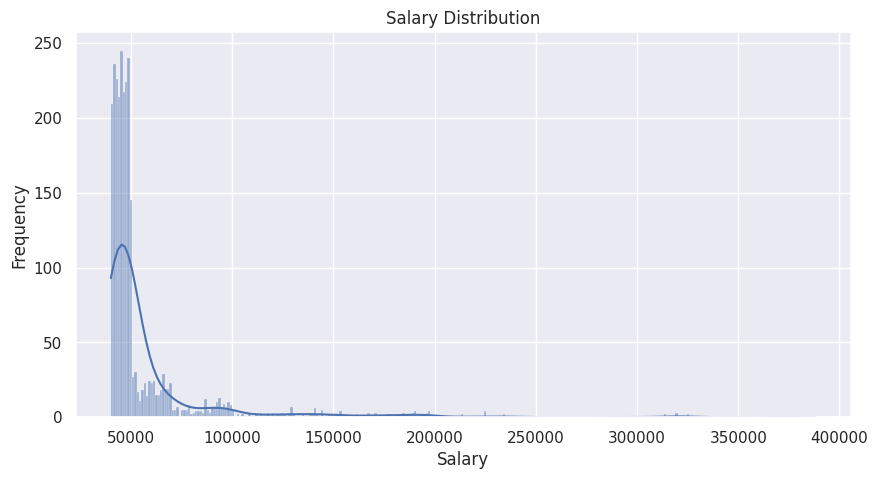

In [141]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SALARY'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
print()

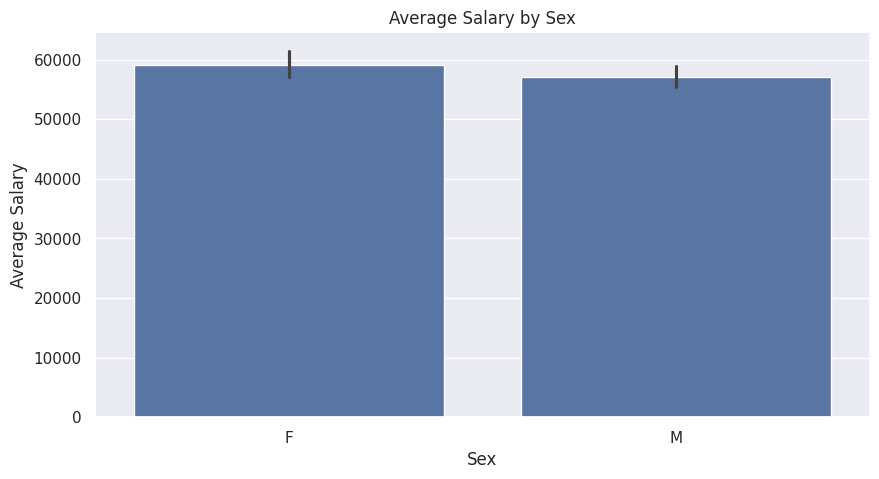

In [142]:

plt.figure(figsize=(10, 5))
sns.barplot(x=df['SEX'], y=df['SALARY'])
plt.title(f'Average Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Salary')
#plt.xticks(rotation=45)
plt.show()
print()

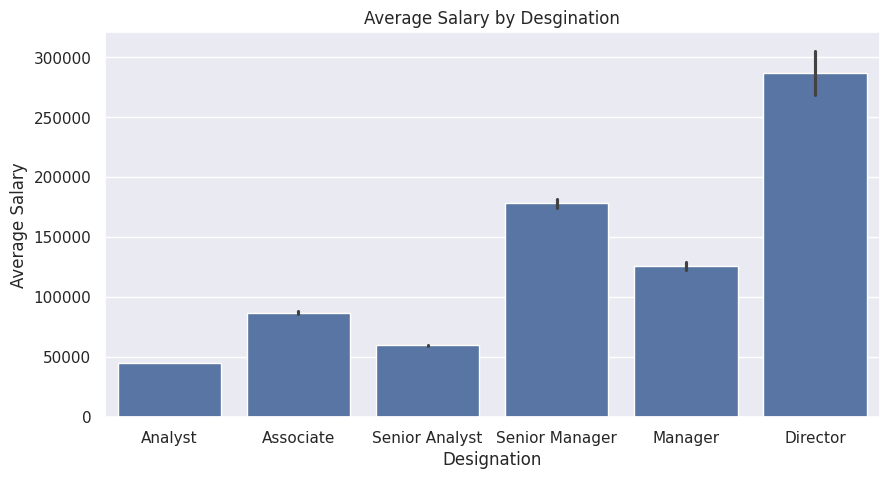

In [143]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['DESIGNATION'], y=df['SALARY'])
plt.title(f'Average Salary by Desgination')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
#plt.xticks(rotation=45)
plt.show()
print()

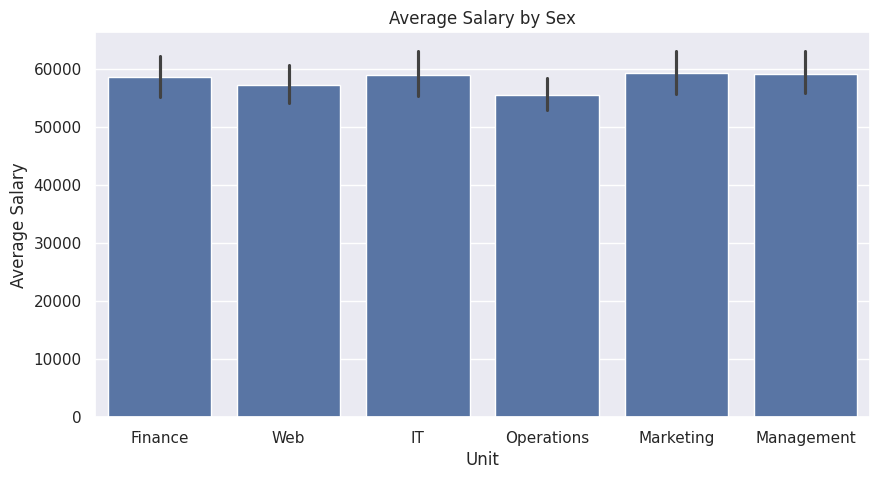

In [144]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['UNIT'], y=df['SALARY'])
plt.title(f'Average Salary by Sex')
plt.xlabel('Unit')
plt.ylabel('Average Salary')
#plt.xticks(rotation=45)
plt.show()
print()

##Get Data Info

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [146]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [147]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

##Find Missing Values

In [148]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

#Task 5: Perform Data Cleaning

How does Sex, Designation and units affect salary?
Drop all othere columns

In [149]:
df = df.drop(columns=['DOJ', 'CURRENT DATE','FIRST NAME','LAST NAME','LEAVES REMAINING','PAST EXP','AGE','LEAVES USED', 'RATINGS'])
df =df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2461 entries, 0 to 2638
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SEX          2461 non-null   object
 1   DESIGNATION  2461 non-null   object
 2   SALARY       2461 non-null   int64 
 3   UNIT         2461 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.1+ KB


In [150]:
# Convert sex to integers
df['SEX'] = df['SEX'].replace({'M': 1, 'F': 0})


In [151]:
#convert designation categories to integers
df[['SEX','DESIGNATION','UNIT' ]]= df[['SEX','DESIGNATION','UNIT' ]].astype('category')
df[['SEX','DESIGNATION','UNIT' ]] = df[['SEX','DESIGNATION','UNIT' ]].apply(lambda x: x.cat.codes)
df.head()

,SEX,DESIGNATION,SALARY,UNIT
0,0,0,44570,0
1,0,1,89207,5
2,0,0,40955,0
3,0,0,45550,1
4,1,0,43161,4


#Task 6: Visualize Cleaned up Dataset

In [152]:
df.head()

,SEX,DESIGNATION,SALARY,UNIT
0,0,0,44570,0
1,0,1,89207,5
2,0,0,40955,0
3,0,0,45550,1
4,1,0,43161,4


#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [153]:
x=df[['SEX','DESIGNATION','UNIT' ]]
y=df['SALARY']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

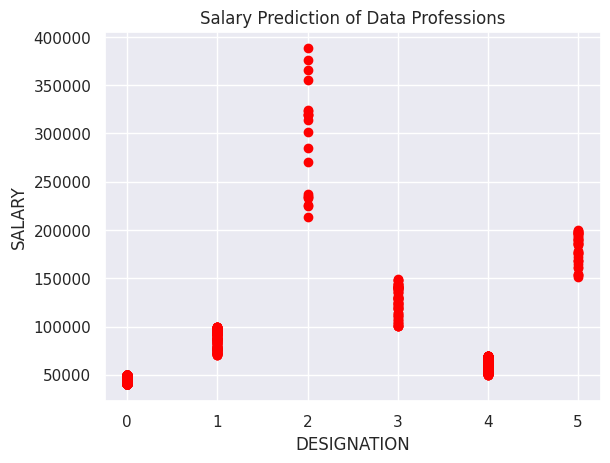

In [155]:
plt.scatter(x_train['DESIGNATION'], y_train, color='red')
plt.title('Salary Prediction of Data Professions')
plt.xlabel('DESIGNATION')
plt.ylabel('SALARY')
plt.show()

#Task 9: Choose the ML Method to follow

In [156]:
regressor = LinearRegression()

#Task 10: Train the ML Model

In [157]:
regressor.fit(x_train, y_train)

LinearRegression()

In [158]:
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinarRegressor_model = LinearRegression()

In [161]:
models = [DecisionTree_model, RandomForest_model, LinarRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!


### MAKING PREDICTIONS**





In [159]:
y_pred = regressor.predict(x_test)

In [160]:
#DESIGNATION = 1

#SALARY = regressor.predict([[DESIGNATION]])

#print(f'A {DESIGNATION}  makes about {SALARY} a year');

#Task 11: Test the Model

In [162]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinarRegressor = LinarRegressor_model.score(x_test, y_test)

In [163]:
models = {'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 'LinarRegressor_model': accuracy_LinarRegressor}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the DecisionTree_model is 96.62%
The accuracy score for the RandomForest_model is 96.27%
The accuracy score for the LinarRegressor_model is 30.03%


In [165]:
df.head()

,SEX,DESIGNATION,SALARY,UNIT
0,0,0,44570,0
1,0,1,89207,5
2,0,0,40955,0
3,0,0,45550,1
4,1,0,43161,4


In [166]:
test_x = np.zeros((1, 3))
test_x

array([[0., 0., 0.]])

In [168]:
test_x[0,0]= 0 #SEX
test_x[0,1]= 0 #DESIGNATION
test_x[0,2]= 0 #UNIT

In [170]:
test_x

array([[0., 0., 0.]])

In [173]:
models = [DecisionTree_model, RandomForest_model, LinarRegressor_model]
for model in models:
    prediction = model.predict(test_x)
    print(f'The model {model} predicts a salary for a  professional in data to ${round(float(prediction[0]), 2)} per year')

The model DecisionTreeRegressor() predicts a salary for a  professional in data to $44745.68 per year
The model RandomForestRegressor() predicts a salary for a  professional in data to $44754.36 per year
The model LinearRegression() predicts a salary for a  professional in data to $49529.87 per year


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
